In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("GAIA IA v.1.2.xlsx")

data.head()

,Unnamed: 0,Matéria-prima 1 (BP1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Produto (Y),Unnamed: 79,Unnamed: 80,Unnamed: 81
0,NaN,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,...,RMS,A.A.,Carbono,L,a,%,Al2O3,Fe2O3,CS-C,Carbono
1,Exemplo 1,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.810569,1.580725,6.599695,0.159
2,Exemplo 2,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.353098,1.6479,6.291125,0.199
3,Exemplo 3,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,28.319949,1.38321,5.647089,0.161
4,Exemplo 4,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,29.190006,1.680295,6.368125,0.184


In [201]:
data.columns
# data = data.drop(data.columns[0], axis=1)
# data.drop(index=0, inplace=True)
data.head()


,Unnamed: 0,Matéria-prima 1 (BP1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Produto (Y),Unnamed: 79,Unnamed: 80,Unnamed: 81
0,NaN,Al2O3,Fe2O3,>63mm,>45mm,CS-C,RMS,A.A.,Carbono,L,...,RMS,A.A.,Carbono,L,a,%,Al2O3,Fe2O3,CS-C,Carbono
1,Exemplo 1,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.810569,1.580725,6.599695,0.159
2,Exemplo 2,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,27.353098,1.6479,6.291125,0.199
3,Exemplo 3,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,28.319949,1.38321,5.647089,0.161
4,Exemplo 4,33.196967,2.647673,5.7,6.2,47.754574,11.96993,2.954063,1.39,74.92,...,0,0,0,0,0,0,29.190006,1.680295,6.368125,0.184


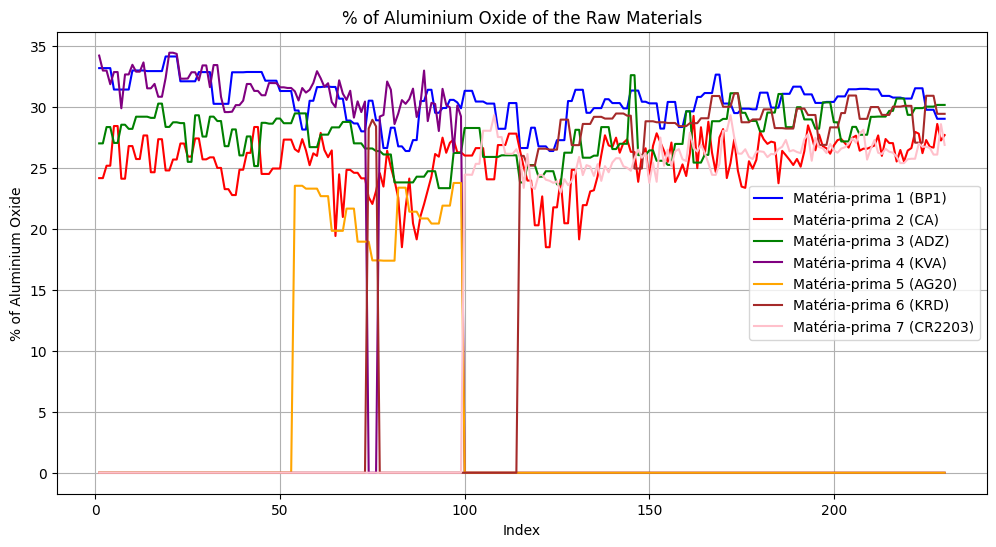

In [202]:
columns = [
    "Matéria-prima 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)"   
]

legend_labels = [
    "Matéria-prima 1 (BP1)",
    "Matéria-prima 2 (CA)",
    "Matéria-prima 3 (ADZ)",
    "Matéria-prima 4 (KVA)",
    "Matéria-prima 5 (AG20)",
    "Matéria-prima 6 (KRD)",
    "Matéria-prima 7 (CR2203)"   
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")


colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Aluminium Oxide")
plt.title("% of Aluminium Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

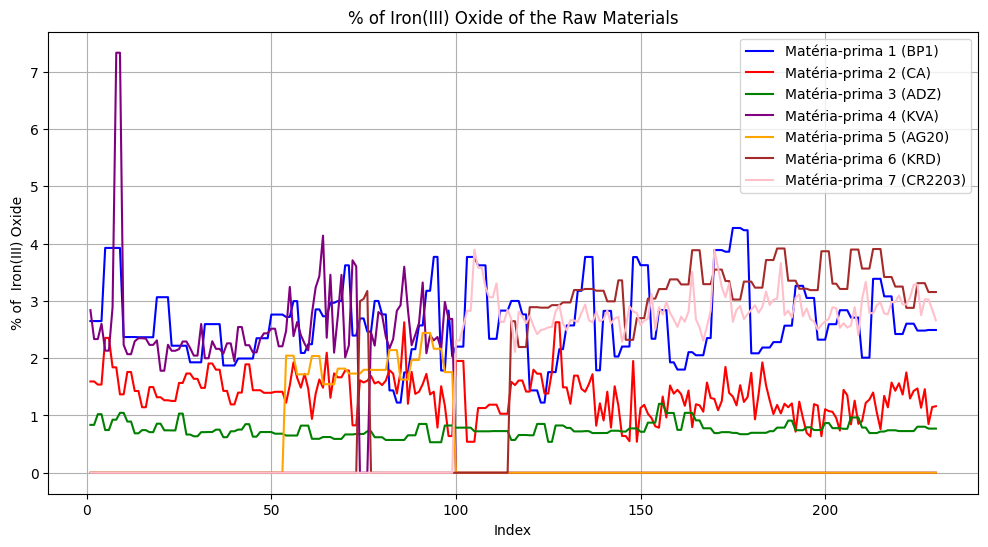

In [203]:
columns = [
    "Unnamed: 2",
    "Unnamed: 13",
    "Unnamed: 24",
    "Unnamed: 35",
    "Unnamed: 46",
    "Unnamed: 57",
    "Unnamed: 68",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of  Iron(III) Oxide")
plt.title("% of Iron(III) Oxide of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

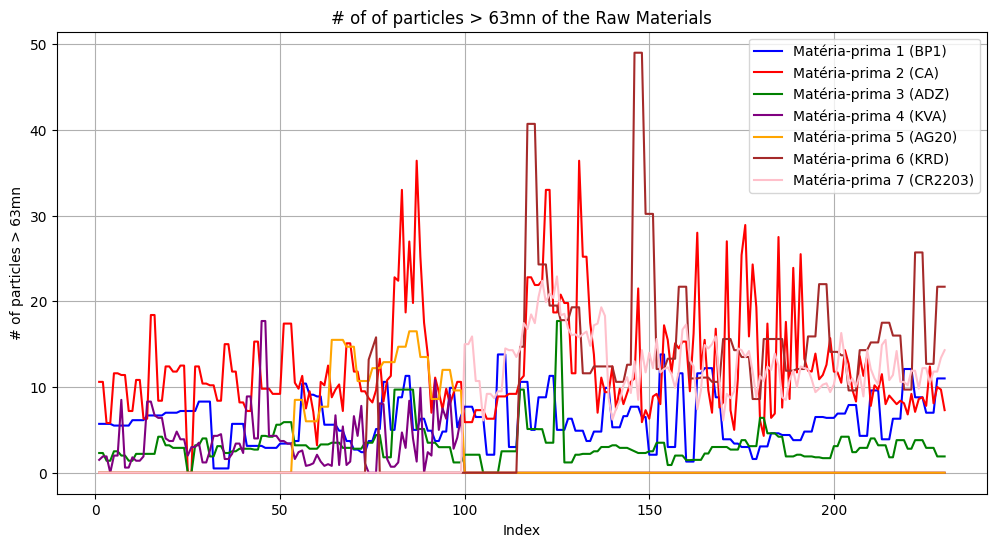

In [204]:
columns = [
    "Unnamed: 3",
    "Unnamed: 14",
    "Unnamed: 25",
    "Unnamed: 36",
    "Unnamed: 47",
    "Unnamed: 58",
    "Unnamed: 69",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("# of particles > 63mn")
plt.title("# of of particles > 63mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

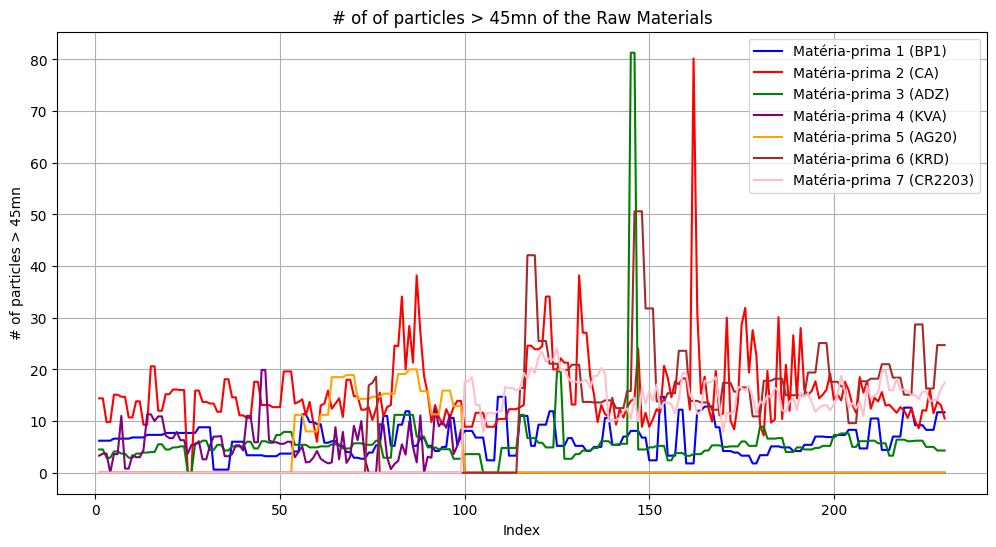

In [205]:
columns = [
    "Unnamed: 4",
    "Unnamed: 15",
    "Unnamed: 26",
    "Unnamed: 37",
    "Unnamed: 48",
    "Unnamed: 59",
    "Unnamed: 70",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("# of particles > 45mn")
plt.title("# of of particles > 45mn of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()


#não usar simbolos especiais só cores

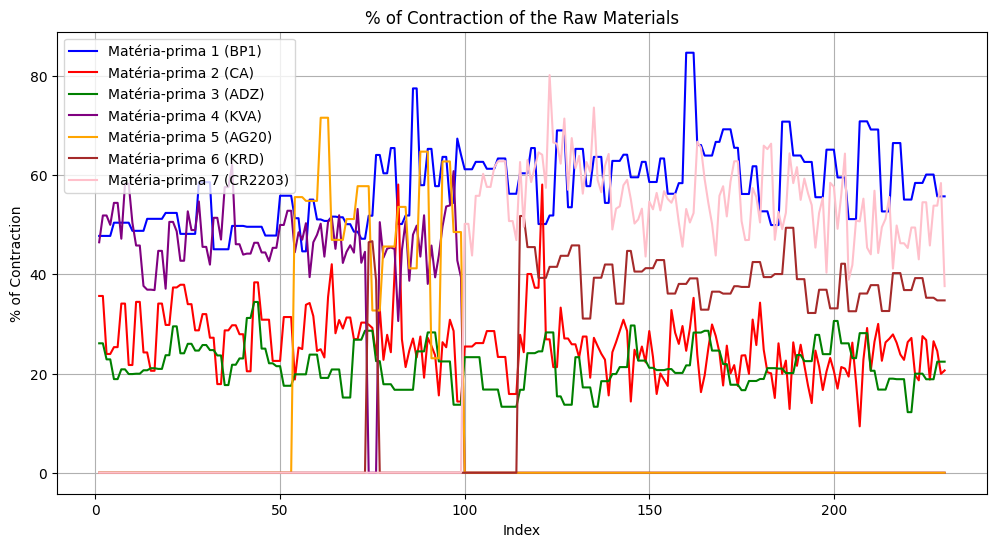

In [206]:
columns = [
    "Unnamed: 5",
    "Unnamed: 16",
    "Unnamed: 27",
    "Unnamed: 38",
    "Unnamed: 49",
    "Unnamed: 60",
    "Unnamed: 71",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Contraction")
plt.title("% of Contraction of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

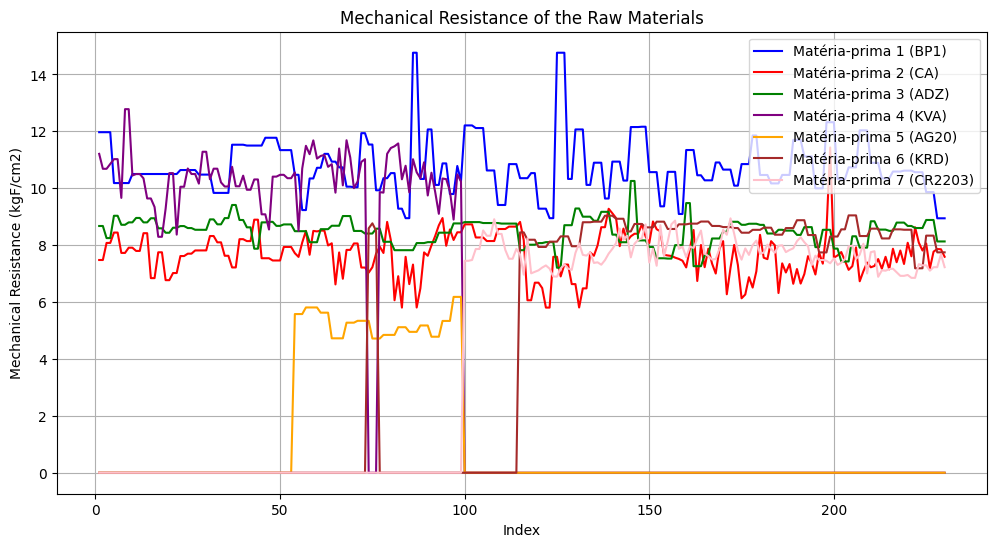

In [207]:
columns = [
    "Unnamed: 6",
    "Unnamed: 17",
    "Unnamed: 28",
    "Unnamed: 39",
    "Unnamed: 50",
    "Unnamed: 61",
    "Unnamed: 72",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

markers = ["o", "s", "D", "^", "v", "*", "x"]
colors = ["blue", "red", "green", "purple", "orange", "brown", "pink"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Mechanical Resistance (kgF/cm2)")
plt.title("Mechanical Resistance of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

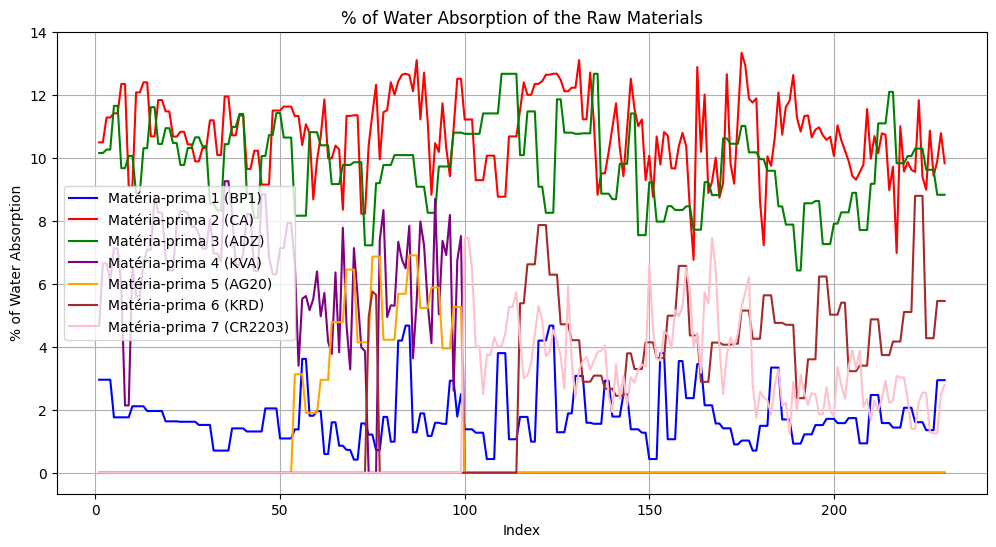

In [208]:
columns = [
    "Unnamed: 7",
    "Unnamed: 18",
    "Unnamed: 29",
    "Unnamed: 40",
    "Unnamed: 51",
    "Unnamed: 62",
    "Unnamed: 73",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])


plt.xlabel("Index")
plt.ylabel("% of Water Absorption")
plt.title("% of Water Absorption of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

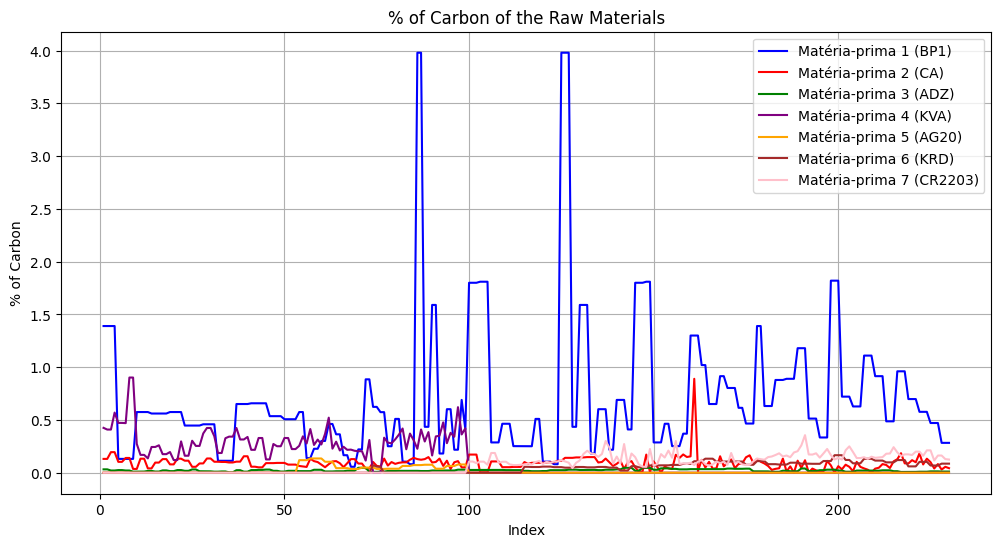

In [209]:
columns = [
    "Unnamed: 8",
    "Unnamed: 19",
    "Unnamed: 30",
    "Unnamed: 41",
    "Unnamed: 52",
    "Unnamed: 63",
    "Unnamed: 74",]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))


for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of Carbon")
plt.title("% of Carbon of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

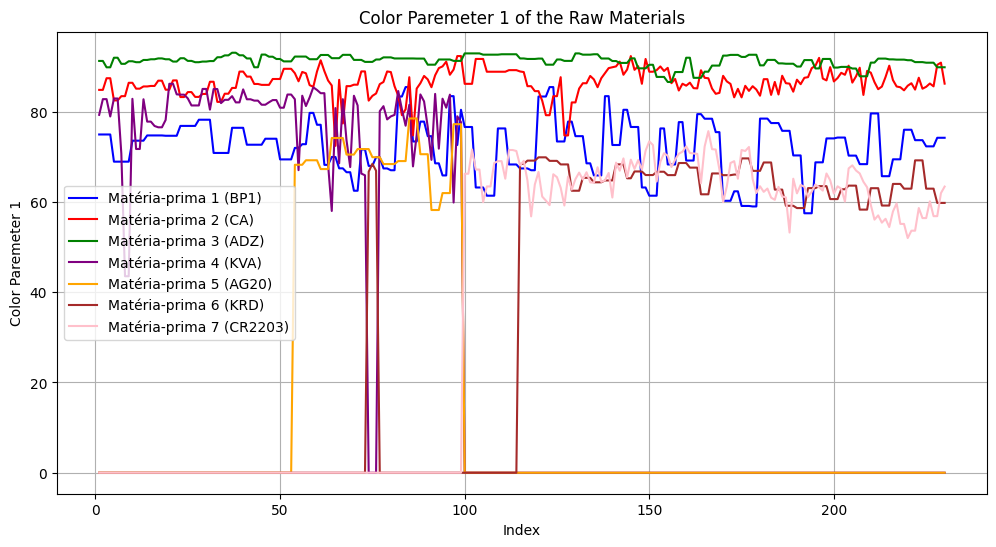

In [210]:
columns = [
    "Unnamed: 9",
    "Unnamed: 20",
    "Unnamed: 31",
    "Unnamed: 42",
    "Unnamed: 53",
    "Unnamed: 64",
    "Unnamed: 75",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 1")
plt.title("Color Paremeter 1 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

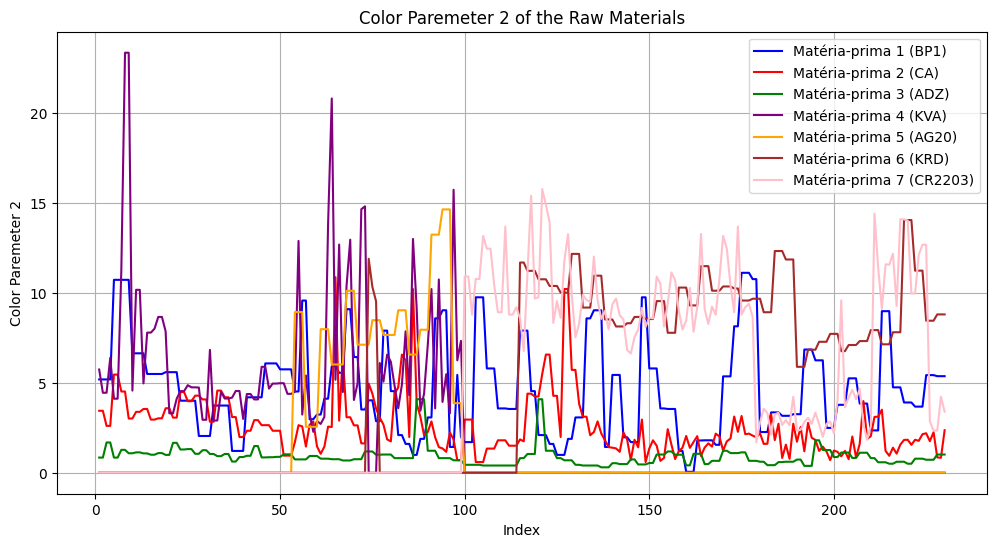

In [211]:
columns = [
    "Unnamed: 10",
    "Unnamed: 21",
    "Unnamed: 32",
    "Unnamed: 43",
    "Unnamed: 54",
    "Unnamed: 65",
    "Unnamed: 76",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Color Paremeter 2")
plt.title("Color Paremeter 2 of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

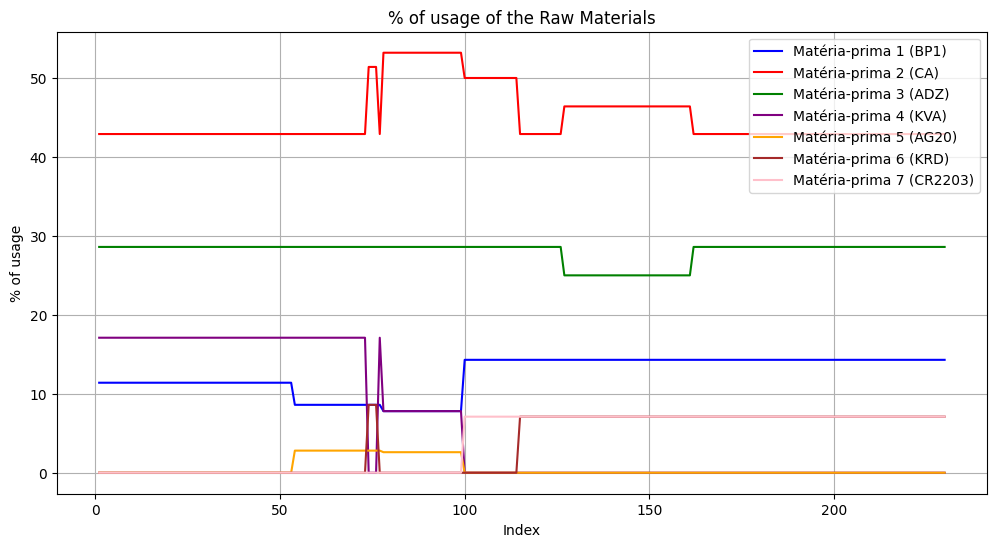

In [212]:
columns = [
    "Unnamed: 11",
    "Unnamed: 22",
    "Unnamed: 33",
    "Unnamed: 44",
    "Unnamed: 55",
    "Unnamed: 66",
    "Unnamed: 77",
]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col],  linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("% of usage")
plt.title("% of usage of the Raw Materials")
plt.legend()
plt.grid(True)

plt.show()

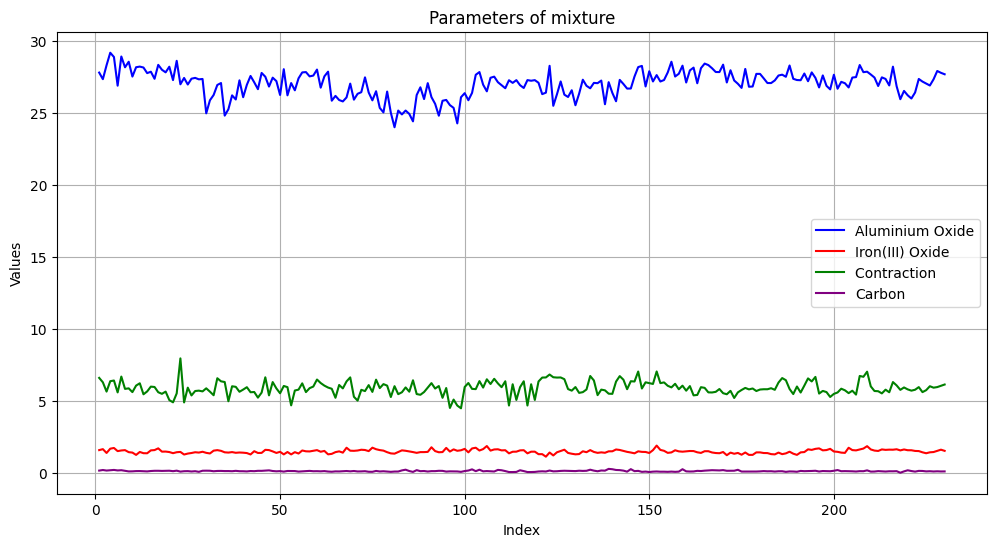

In [213]:
columns = [
    "Produto (Y)",
    "Unnamed: 79",
    "Unnamed: 80",
    "Unnamed: 81",
]

legend_labels = ["Aluminium Oxide", "Iron(III) Oxide", "Contraction ", "Carbon"]

for col in columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.plot(data.index, data[col], linestyle='-', color=colors[i], label=legend_labels[i])

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Parameters of mixture")
plt.legend()
plt.grid(True)

plt.show()

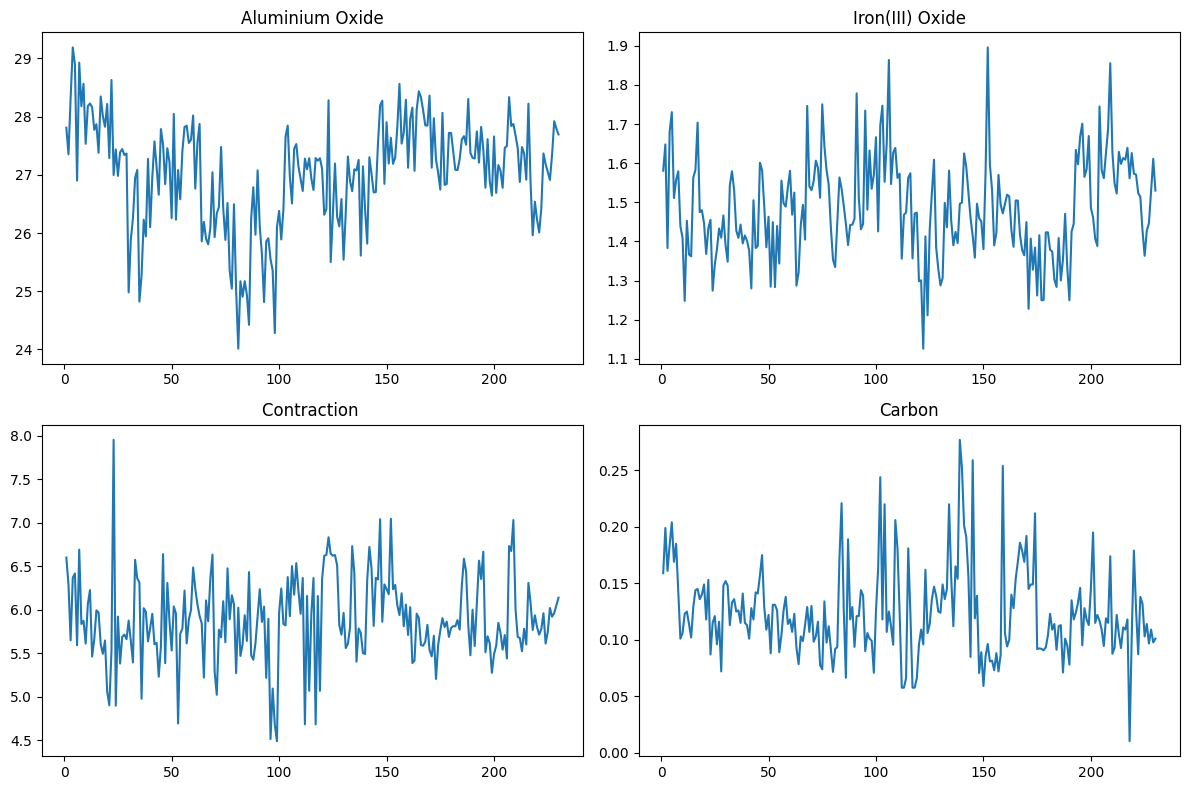

In [218]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    axs[row, col_index].plot(data.index, data[col])
    axs[row, col_index].set_title(legend_labels[i])

plt.tight_layout()
plt.show()


In [215]:
# fig, ax = plt.subplots(figsize=(12, 6))

# ax = sns.heatmap(data.corr(), annot=True)

# ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# plt.title("Correlation Heatmap")


sem simbolos
boxplots e histo
corr matrix 
4 subplots individuais
Normalizar dados

1 state of the art
data anali
models used
conslusions
